In [1]:
!pip install statsmodels==0.13.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 33.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,  plot_confusion_matrix

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

### Datos


El set de datos `Carseats`, accesible en Python a través de `statsmodels.datasets.get_rdataset`, contiene información sobre:

- La venta de sillas de seguridad infantiles en 400 tiendas distintas. 
- Para cada una de las 400 tiendas se han registrado 11 variables. 

**objetivo:** Generar un modelo de clasificación que permita predecir si una tienda tiene ventas altas `(Sales > 8)` o `bajas (Sales <= 8)` en función de todas las variables disponibles.

In [3]:
carseats = sm.datasets.get_rdataset("Carseats", "ISLR")
datos = carseats.data
print(carseats.__doc__)

.. container::

   ======== ===============
   Carseats R Documentation
   ======== ===============

   .. rubric:: Sales of Child Car Seats
      :name: sales-of-child-car-seats

   .. rubric:: Description
      :name: description

   A simulated data set containing sales of child car seats at 400
   different stores.

   .. rubric:: Usage
      :name: usage

   ::

      Carseats

   .. rubric:: Format
      :name: format

   A data frame with 400 observations on the following 11 variables.

   ``Sales``
      Unit sales (in thousands) at each location

   ``CompPrice``
      Price charged by competitor at each location

   ``Income``
      Community income level (in thousands of dollars)

   ``Advertising``
      Local advertising budget for company at each location (in
      thousands of dollars)

   ``Population``
      Population size in region (in thousands)

   ``Price``
      Price company charges for car seats at each site

   ``ShelveLoc``
      A factor with levels ``Bad``,

In [4]:
datos.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
datos.shape

(400, 11)

In [6]:
datos.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [7]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 53.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [8]:
import sweetviz as sw

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
reporte=sw.analyze(datos, target_feat="Sales")

Feature: Sales (TARGET)                      |▊         | [  8%]   00:00 -> (00:00 left)/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/nanops.py:1682: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=axis, interpolation=interpolation)
Feature: CompPrice                           |█▋        | [ 17%]   00:01 -> (00:06 left)/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/nanops.py:1682: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=axis, interpolation=interpolation)
Feat

/root/venv/lib/python3.9/site-packages/sweetviz/templates/feature_detail_cat.html:250: DeprecationWarning: 'soft_unicode' has been renamed to 'soft_str'. The old name will be removed in MarkupSafe 2.1.
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



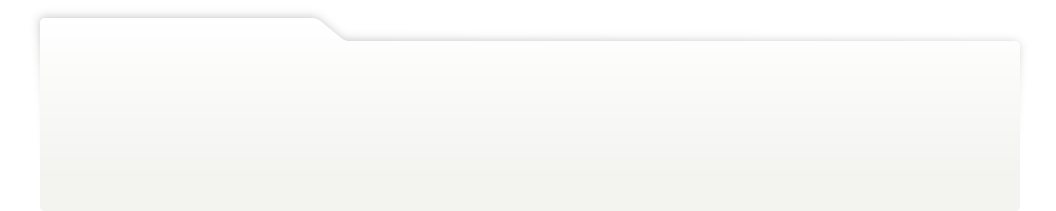
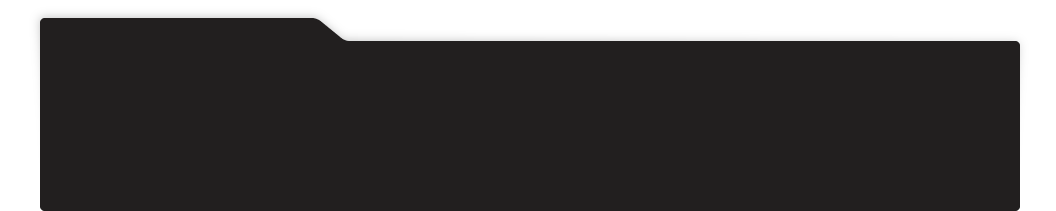
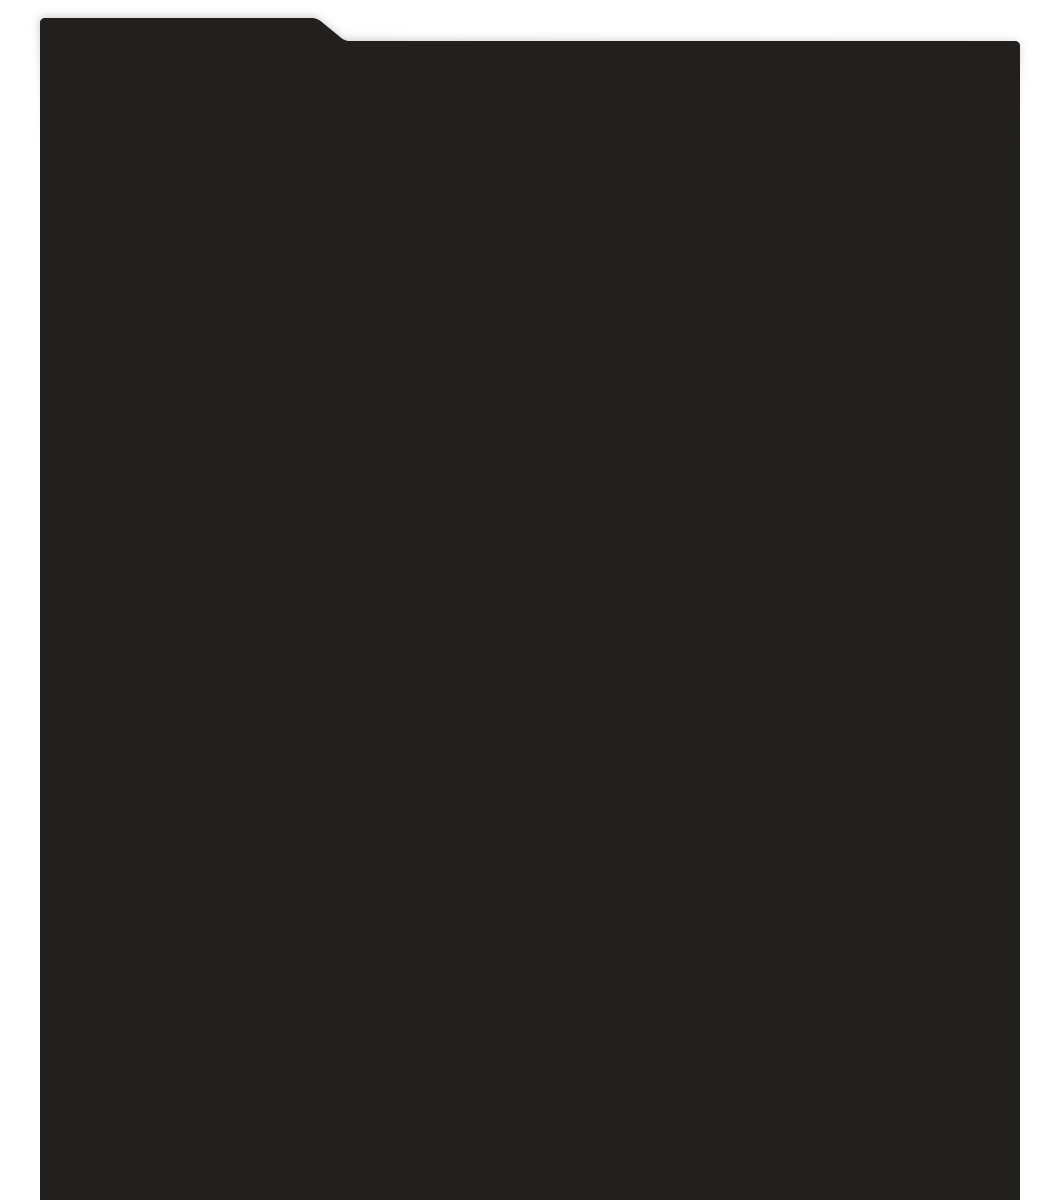
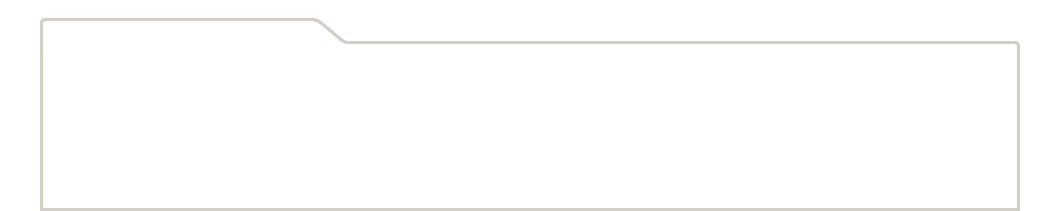
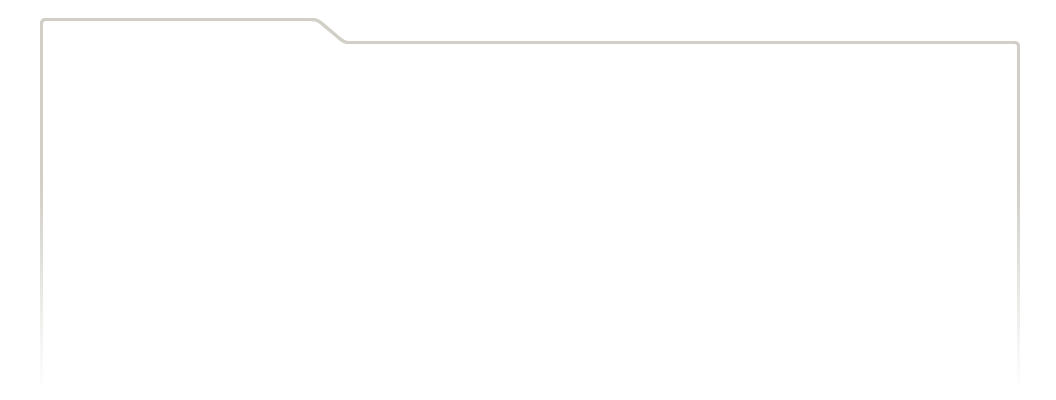
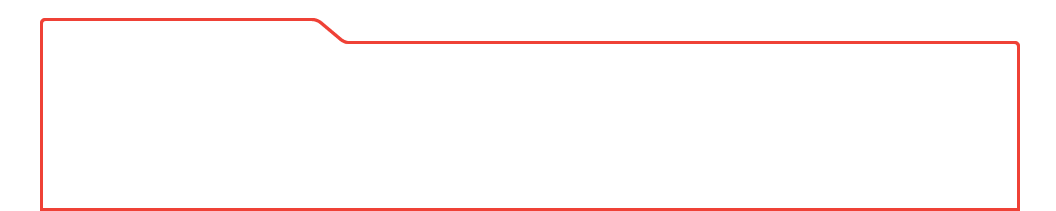
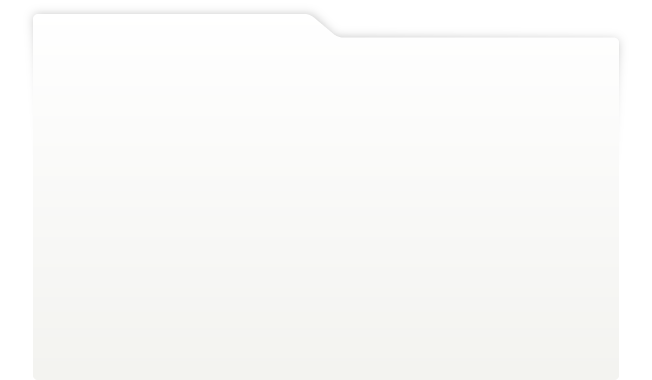
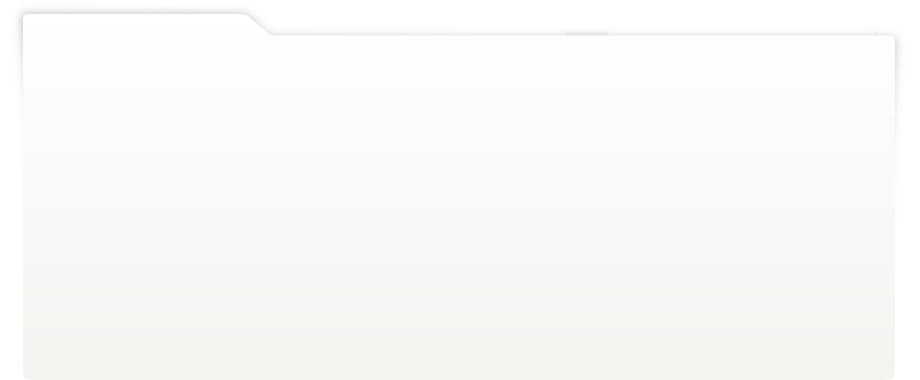
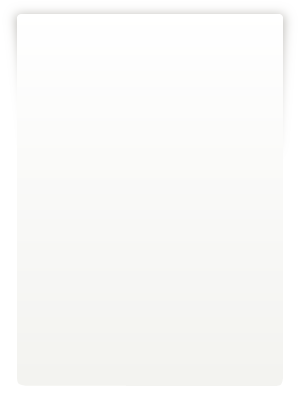
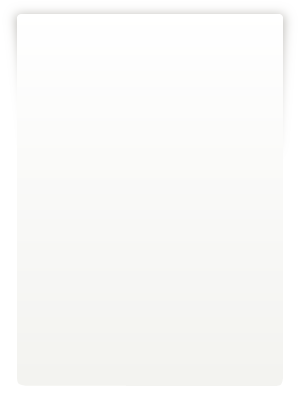
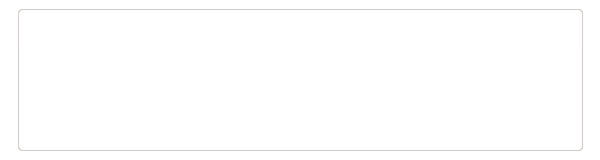
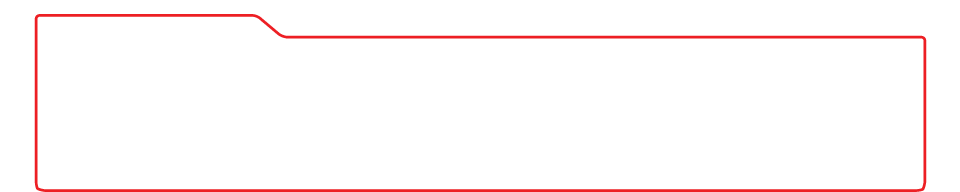
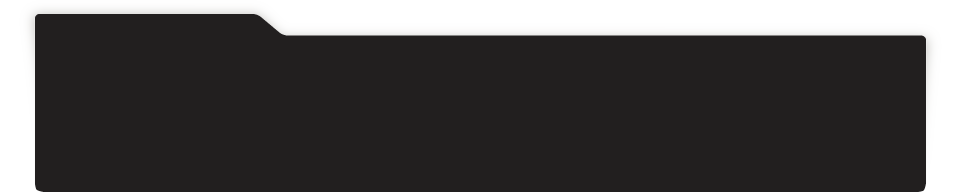
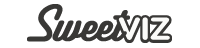
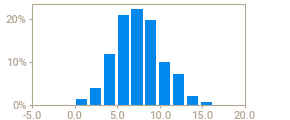
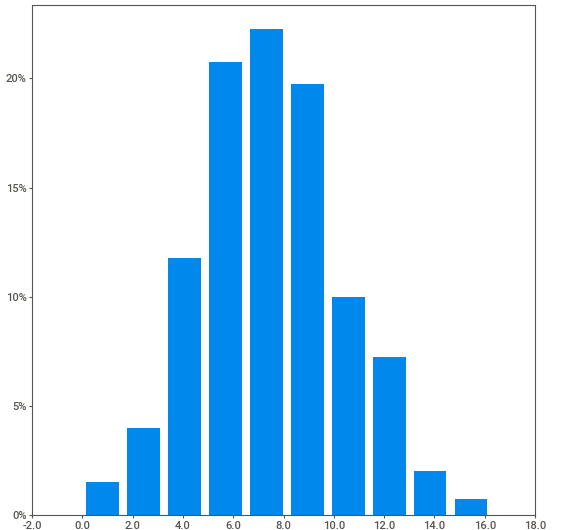
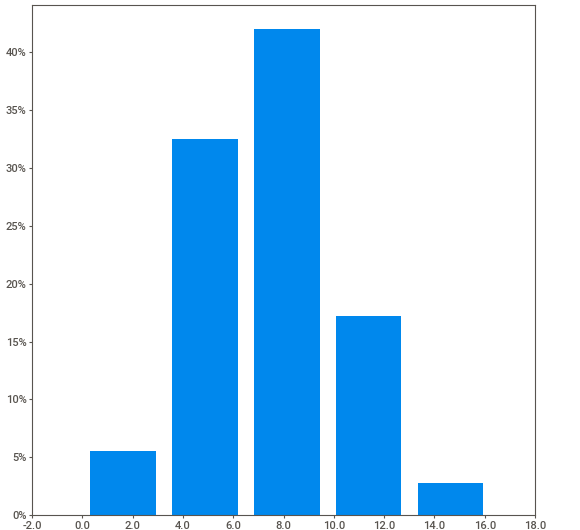
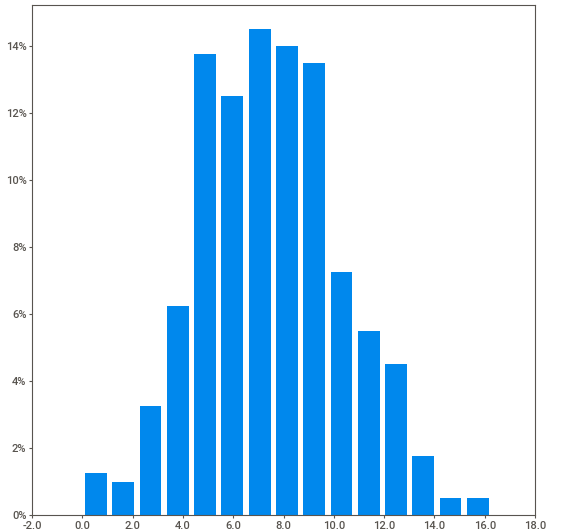
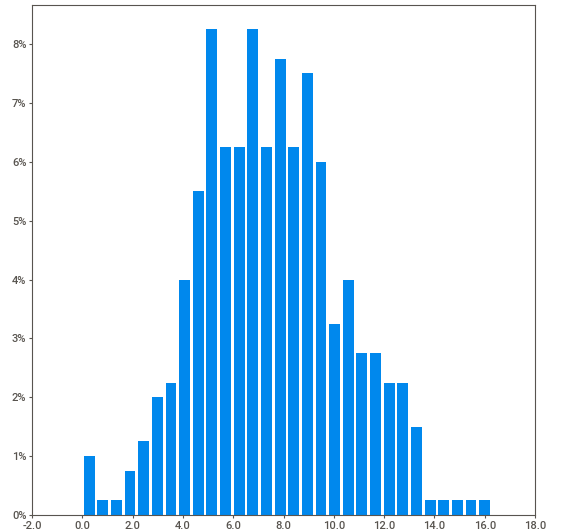
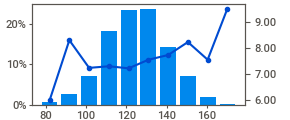
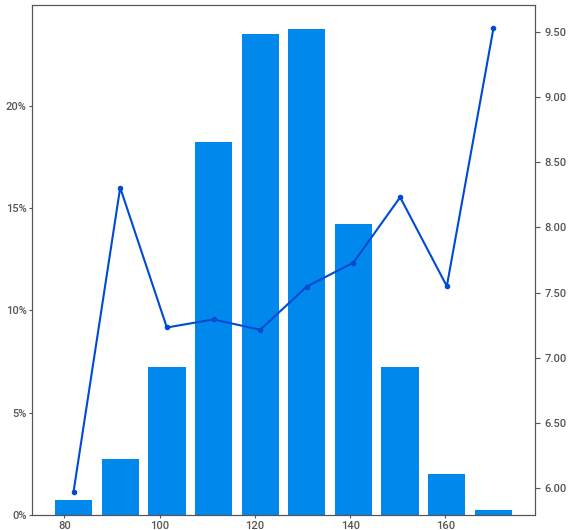
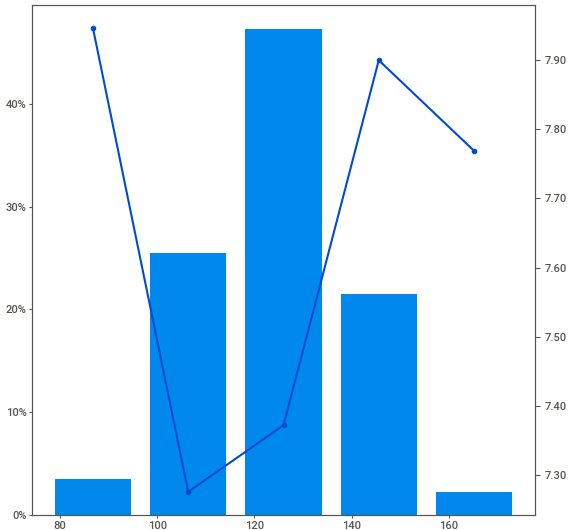
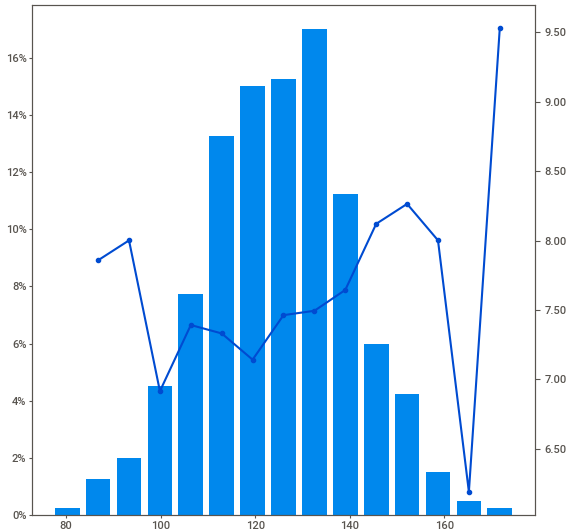
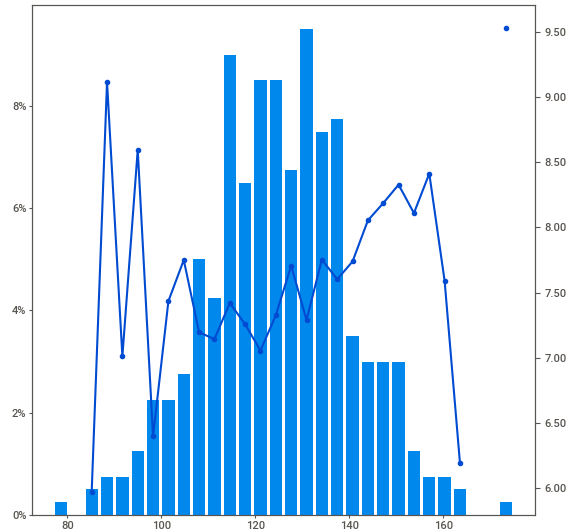
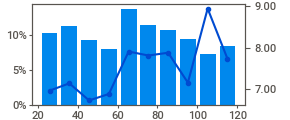
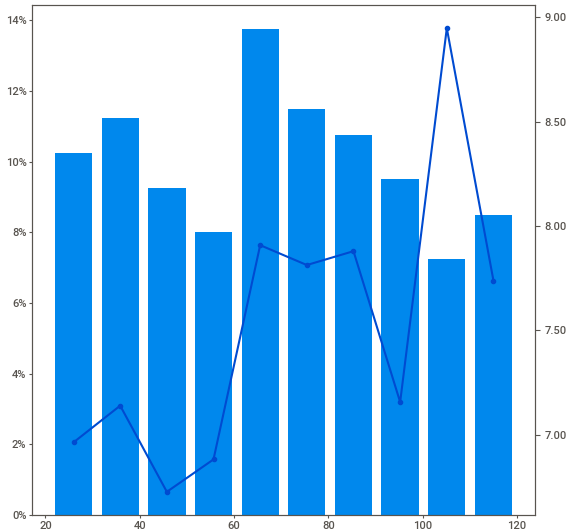
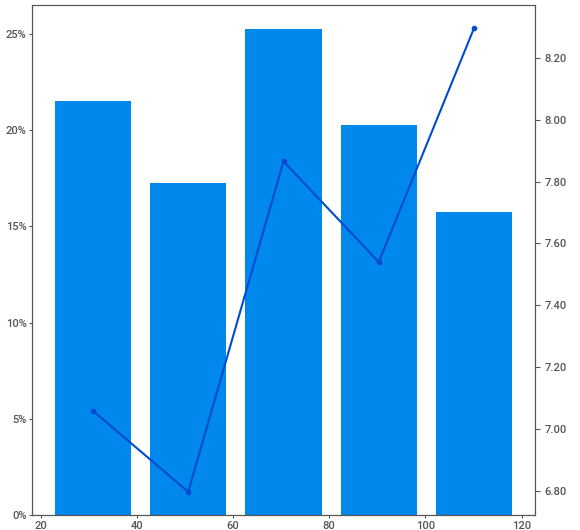
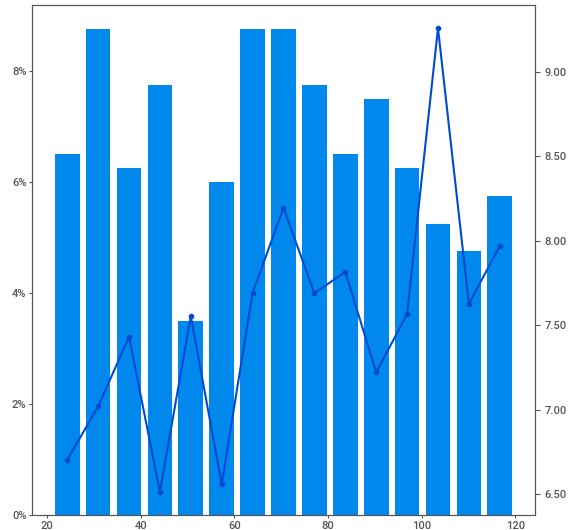
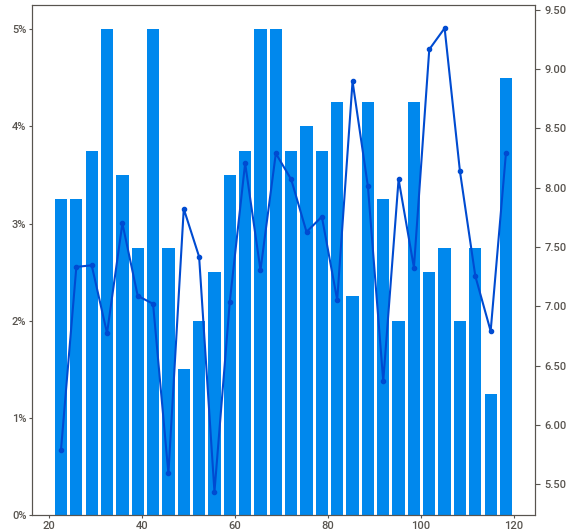
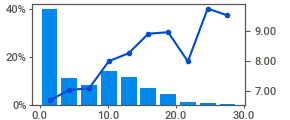
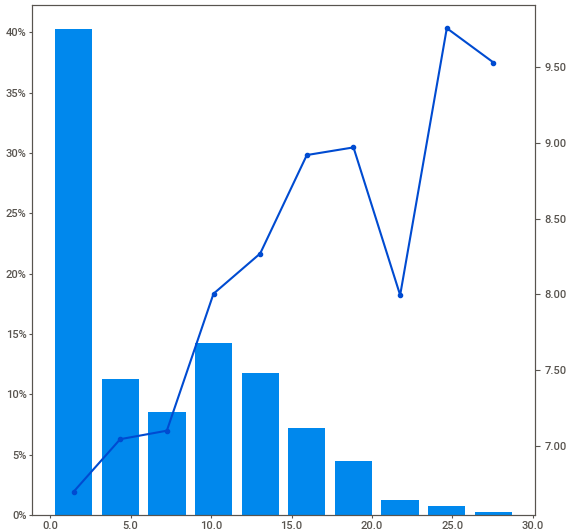
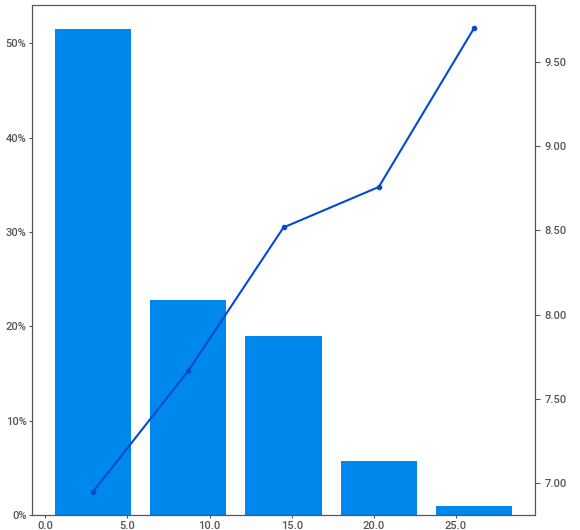
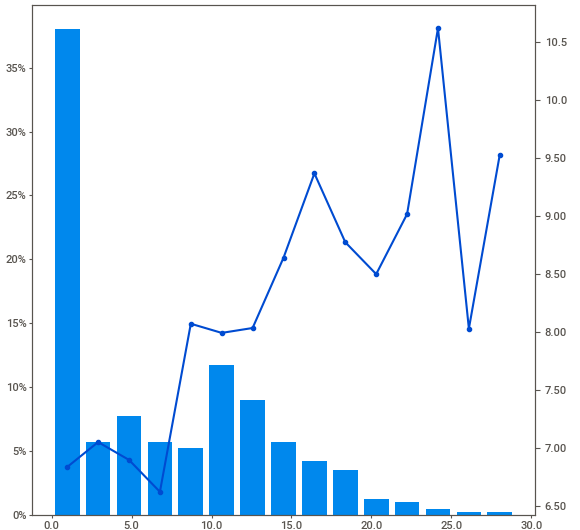
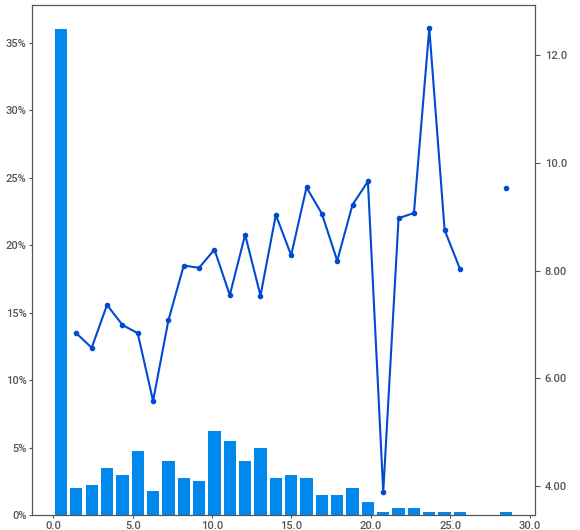
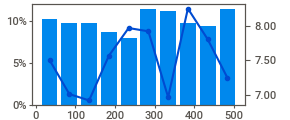
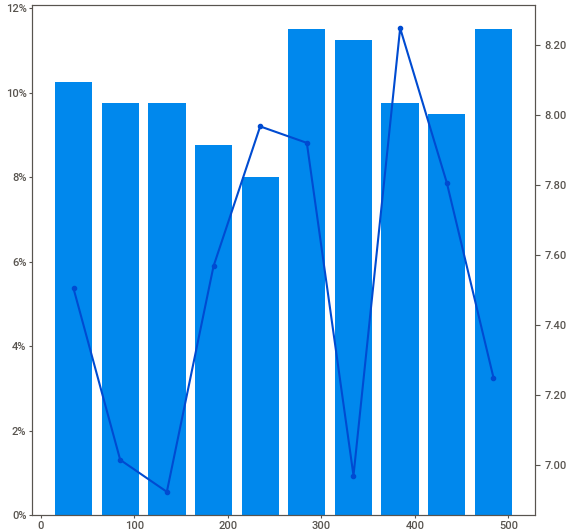
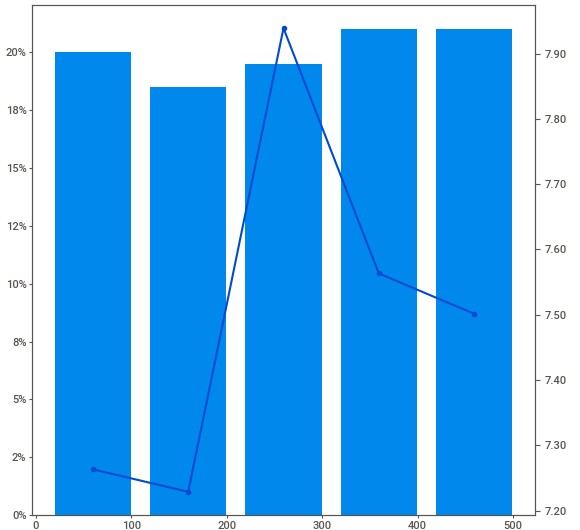
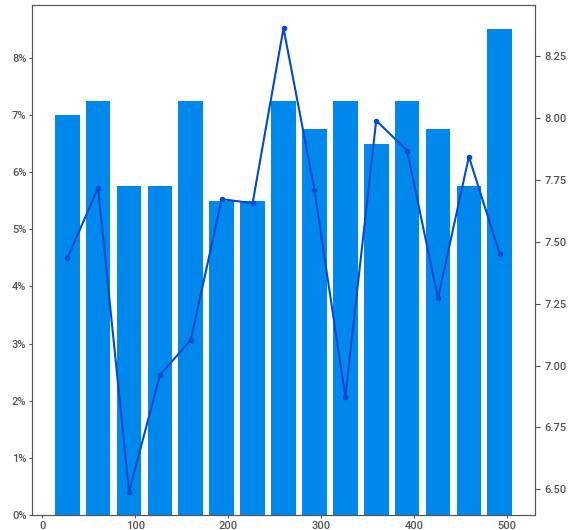
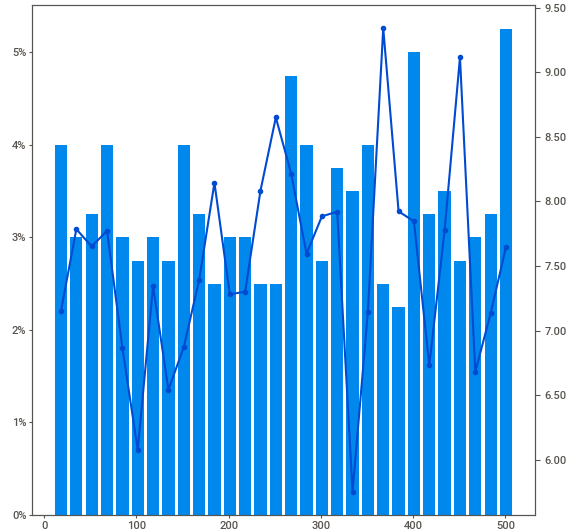
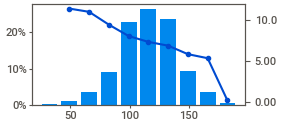
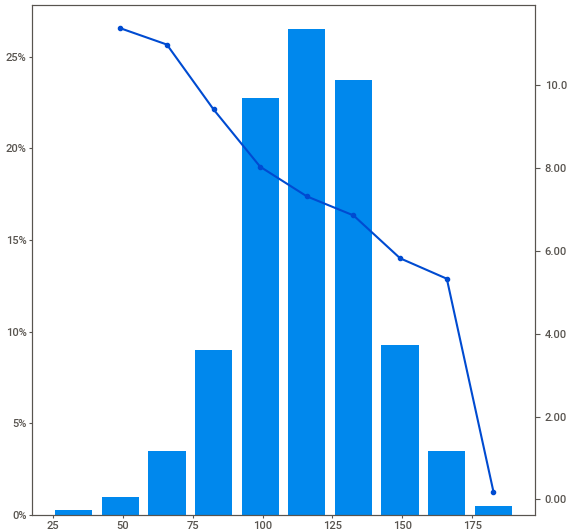
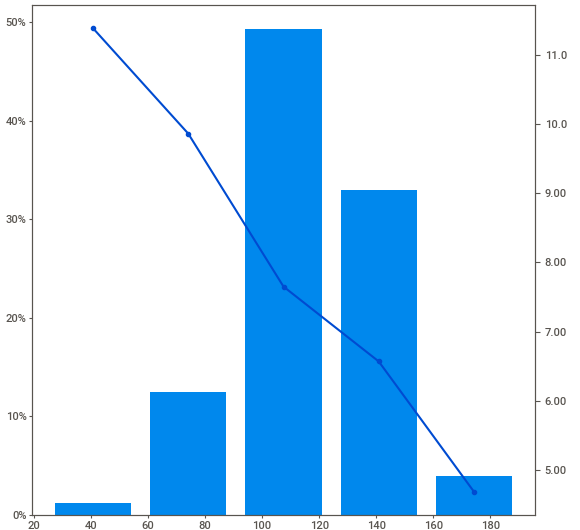
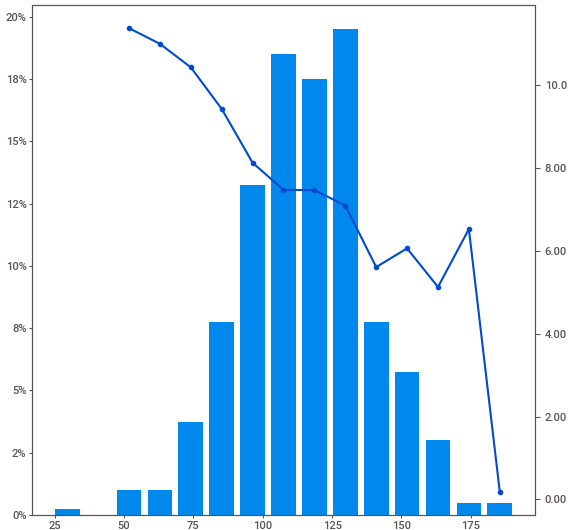
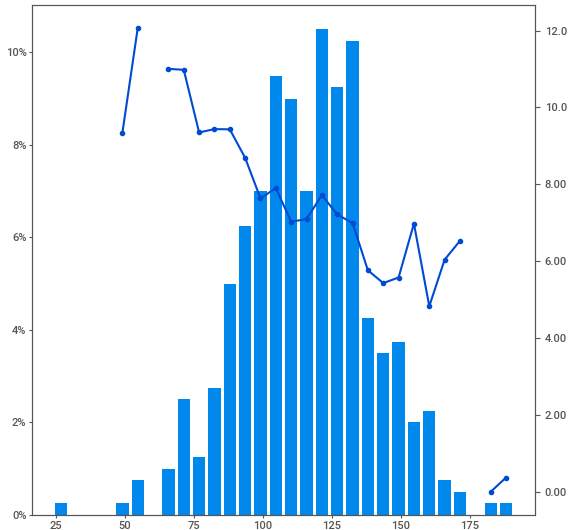
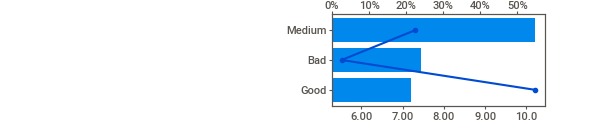
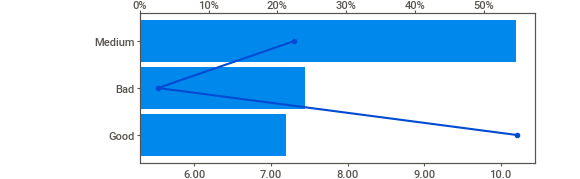
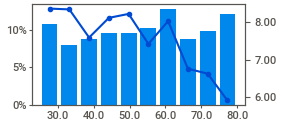
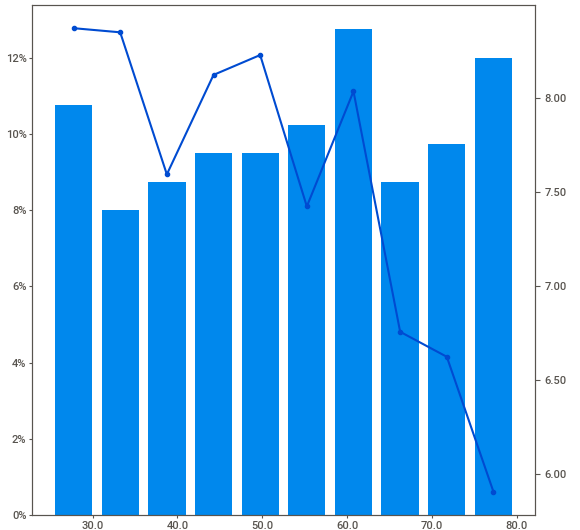
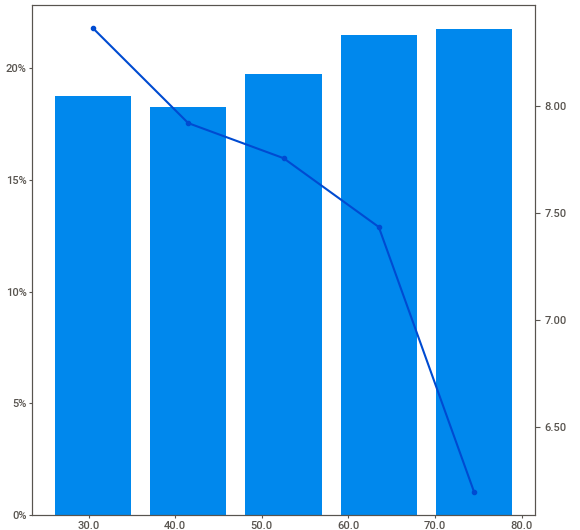
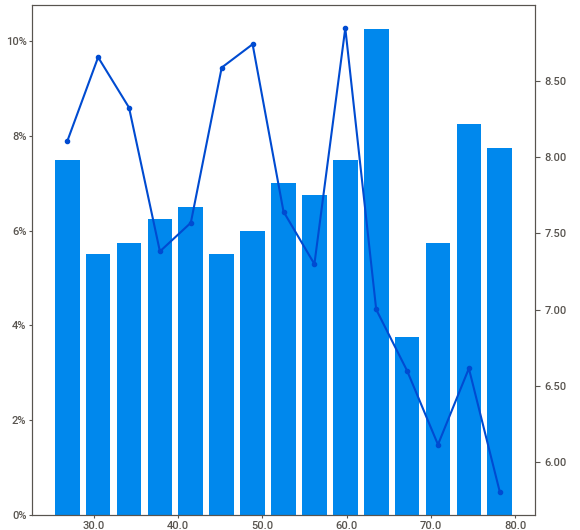
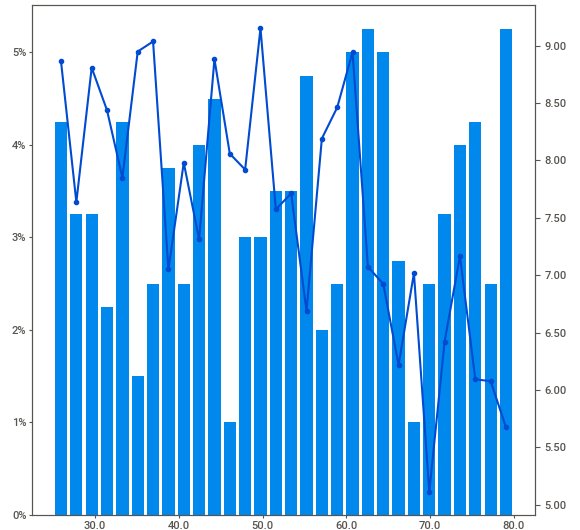
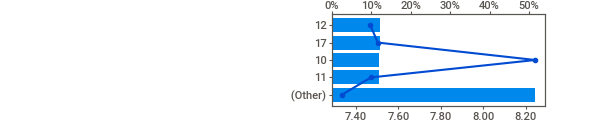
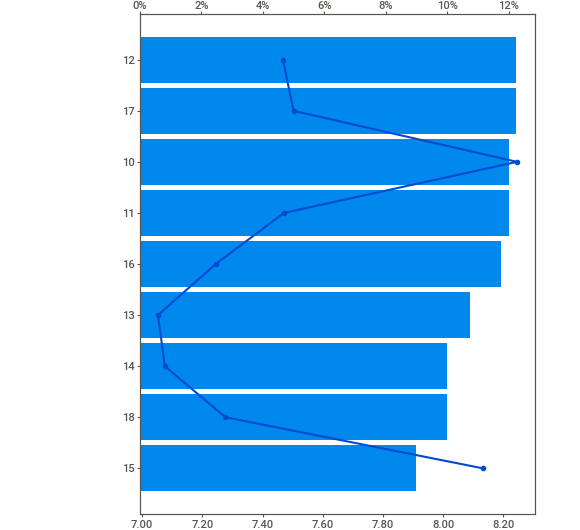
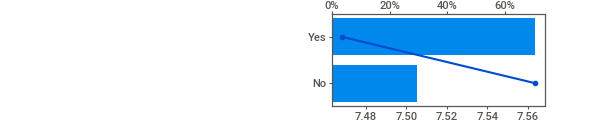
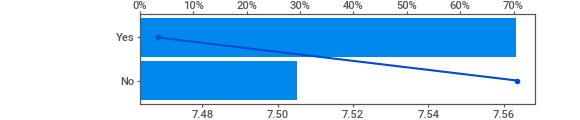
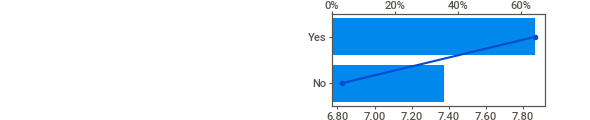
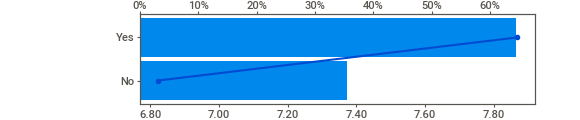
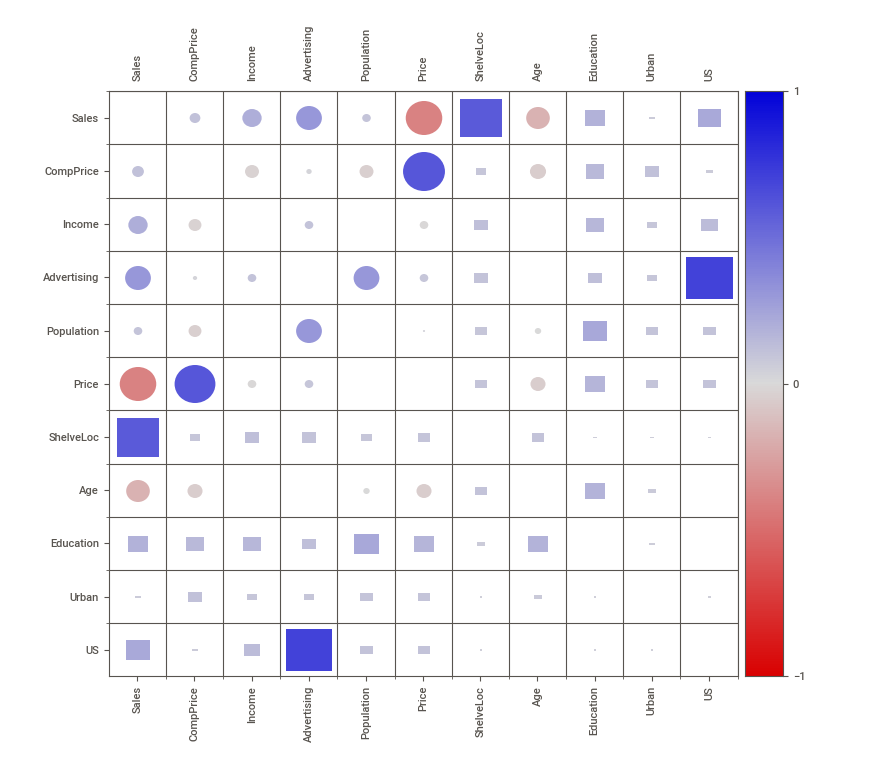
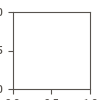

In [10]:
from IPython.display import HTML
reporte.show_html()
HTML("SWEETVIZ_REPORT.html")

In [11]:
HTML("Report SWEETVIZ_REPORT.html")

<AxesSubplot: xlabel='Price', ylabel='Sales'>

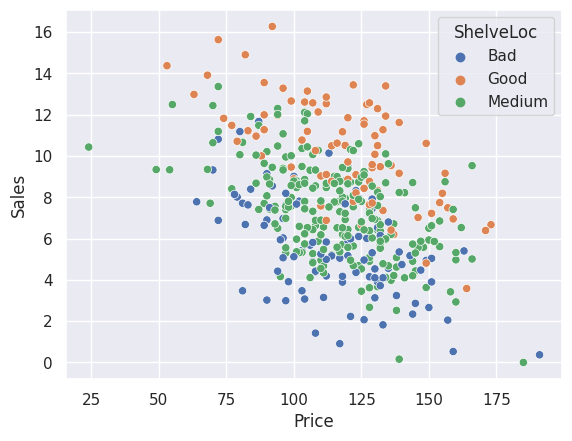

In [12]:
import seaborn as sns
sns.set_theme()
sns.scatterplot(data=datos, x="Price", y='Sales', hue='ShelveLoc')


In [13]:
datos.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

<AxesSubplot: xlabel='Price', ylabel='CompPrice'>

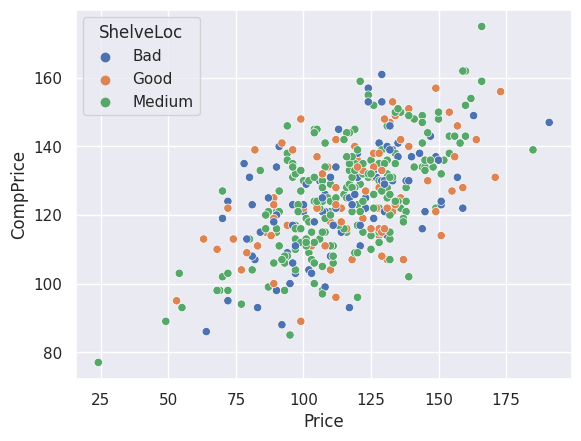

In [14]:
import seaborn as sns
sns.set_theme()
sns.scatterplot(data=datos, x="Price", y='CompPrice', hue='ShelveLoc')


In [15]:
?px.scatter

Signature:
px.scatter(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    symbol=None,
    size=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    symbol_sequence=None,
    symbol_map=None,
    opacity=None,
    size_max=None,
    marginal_x=None,
    marginal_y=None,
    trendline=None,
    trendline_options=None,
    trendline_color_override=None,
    trendline_scope='trace',
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    render_mode='auto',


In [16]:
px.scatter(data_frame=datos, x="Price", y="CompPrice", color="ShelveLoc",  symbol="Urban")

In [17]:
datos.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [18]:
datos.describe()

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/nanops.py:1682: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)



,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [19]:
px.box(data_frame=datos, y="Sales", color="ShelveLoc", points="all", title="Box plot")

`Sales` es una variable continua y el objetivo del estudio es clasificar las tiendas según si venden mucho o poco, se crea una nueva variable dicotómica (0, 1) llamada `ventas_altas`.

In [20]:
datos['ventas_altas'] = np.where(datos.Sales > 8, 1, 0)

In [21]:
datos

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ventas_altas
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


- Una vez creada la nueva variable respuesta se descarta la original


In [22]:
datos = datos.drop(columns = 'Sales')

In [23]:
datos

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ventas_altas
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,139,23,3,37,120,Medium,55,11,No,Yes,0
397,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,100,79,7,284,95,Bad,50,12,Yes,Yes,0


Ejercicio:

Conteo ventas_altas



In [24]:
datos["ventas_altas"].value_counts()

0    236
1    164
Name: ventas_altas, dtype: int64

In [25]:
236/400

0.59

<AxesSubplot: xlabel='ventas_altas', ylabel='count'>

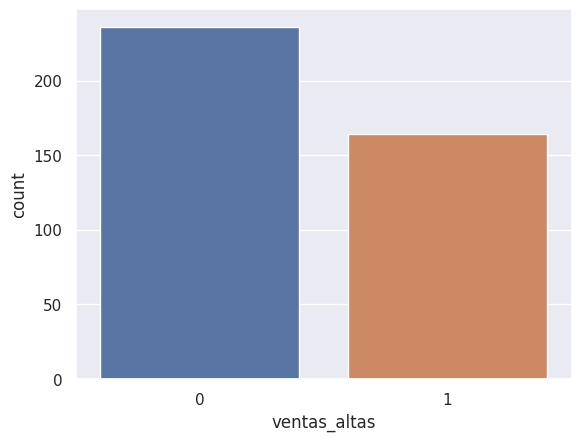

In [26]:
sns.countplot(data=datos, x="ventas_altas")

## Ajuste del modelo


Se ajusta un árbol de clasificación empleando como variable respuesta `ventas_altas` y como predictores todas las variables disponibles. Se utilizan en primer lugar los hiperparámetros `max_depth=5` y `criterion='gini'`, el resto se dejan por defecto. Después, se aplica el proceso de pruning y se comparan los resultados frente al modelo inicial.

ojo en estos estos datos hay variables categóricas por lo que, antes de entrenar el modelo, es necesario aplicar one-hot-encoding.

In [27]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = 'ventas_altas'),
                                        datos['ventas_altas'],
                                        random_state = 123, test_size=0.25
                                    )



In [28]:
X_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
170,128,39,12,356,118,Medium,71,10,Yes,Yes
297,118,83,13,276,104,Bad,75,10,Yes,Yes
148,110,119,0,384,97,Medium,72,14,No,Yes
144,132,68,0,264,123,Good,34,11,No,No
12,122,35,2,393,136,Medium,62,18,Yes,No
...,...,...,...,...,...,...,...,...,...,...
230,115,60,0,119,114,Bad,38,14,No,No
98,122,77,24,382,127,Good,36,16,No,Yes
322,140,50,10,300,139,Good,60,15,Yes,Yes
382,121,28,19,315,121,Medium,66,14,Yes,Yes


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 170 to 365
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    300 non-null    int64 
 1   Income       300 non-null    int64 
 2   Advertising  300 non-null    int64 
 3   Population   300 non-null    int64 
 4   Price        300 non-null    int64 
 5   ShelveLoc    300 non-null    object
 6   Age          300 non-null    int64 
 7   Education    300 non-null    int64 
 8   Urban        300 non-null    object
 9   US           300 non-null    object
dtypes: int64(7), object(3)
memory usage: 25.8+ KB


- One-hot-encoding de las variables categóricas
------------------------------------------------------------------------------
- Se identifica el nobre de las columnas numéricas y categóricas

In [30]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
print(cat_cols)
print(numeric_cols)


['ShelveLoc', 'Urban', 'US']
['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


### Se aplica one-hot-encoding solo a las columnas categóricas


In [31]:
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )



Una vez que se ha definido el objeto `ColumnTransformer`, con el método `fit()`

se aprenden las transformaciones con los datos de entrenamiento y se aplican a los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().

In [32]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [33]:
X_train_prep

array([[  0.,   0.,   1., ..., 118.,  71.,  10.],
       [  1.,   0.,   0., ..., 104.,  75.,  10.],
       [  0.,   0.,   1., ...,  97.,  72.,  14.],
       ...,
       [  0.,   1.,   0., ..., 139.,  60.,  15.],
       [  0.,   0.,   1., ..., 121.,  66.,  14.],
       [  0.,   0.,   1., ..., 162.,  57.,  17.]])

El resultado devuelto por `ColumnTransformer` es un numpy array, por lo que se pierden los nombres de las columnas. Suele ser interesante poder inspeccionar cómo queda el set de datos tras el preprocesado en formato dataframe. Por defecto, OneHotEncoder ordena las nuevas columnas de izquierda a derecha por orden alfabético.

### Convertir el output del ColumnTransformer en dataframe y añadir el nombre de las columnas
------------------------------------------------------------------------------
### Nombre de todas las columnas

In [34]:
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [35]:
# Conversión a dataframe
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
X_train_prep

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,128.0,39.0,12.0,356.0,118.0,71.0,10.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,118.0,83.0,13.0,276.0,104.0,75.0,10.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,110.0,119.0,0.0,384.0,97.0,72.0,14.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,132.0,68.0,0.0,264.0,123.0,34.0,11.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,122.0,35.0,2.0,393.0,136.0,62.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,0.0,0.0,1.0,0.0,1.0,0.0,115.0,60.0,0.0,119.0,114.0,38.0,14.0
296,0.0,1.0,0.0,1.0,0.0,0.0,1.0,122.0,77.0,24.0,382.0,127.0,36.0,16.0
297,0.0,1.0,0.0,0.0,1.0,0.0,1.0,140.0,50.0,10.0,300.0,139.0,60.0,15.0
298,0.0,0.0,1.0,0.0,1.0,0.0,1.0,121.0,28.0,19.0,315.0,121.0,66.0,14.0


In [36]:
X_train_prep

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,128.0,39.0,12.0,356.0,118.0,71.0,10.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,118.0,83.0,13.0,276.0,104.0,75.0,10.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,110.0,119.0,0.0,384.0,97.0,72.0,14.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,132.0,68.0,0.0,264.0,123.0,34.0,11.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,122.0,35.0,2.0,393.0,136.0,62.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,0.0,0.0,1.0,0.0,1.0,0.0,115.0,60.0,0.0,119.0,114.0,38.0,14.0
296,0.0,1.0,0.0,1.0,0.0,0.0,1.0,122.0,77.0,24.0,382.0,127.0,36.0,16.0
297,0.0,1.0,0.0,0.0,1.0,0.0,1.0,140.0,50.0,10.0,300.0,139.0,60.0,15.0
298,0.0,0.0,1.0,0.0,1.0,0.0,1.0,121.0,28.0,19.0,315.0,121.0,66.0,14.0


In [37]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train_prep, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del árbol: 5
Número de nodos terminales: 23


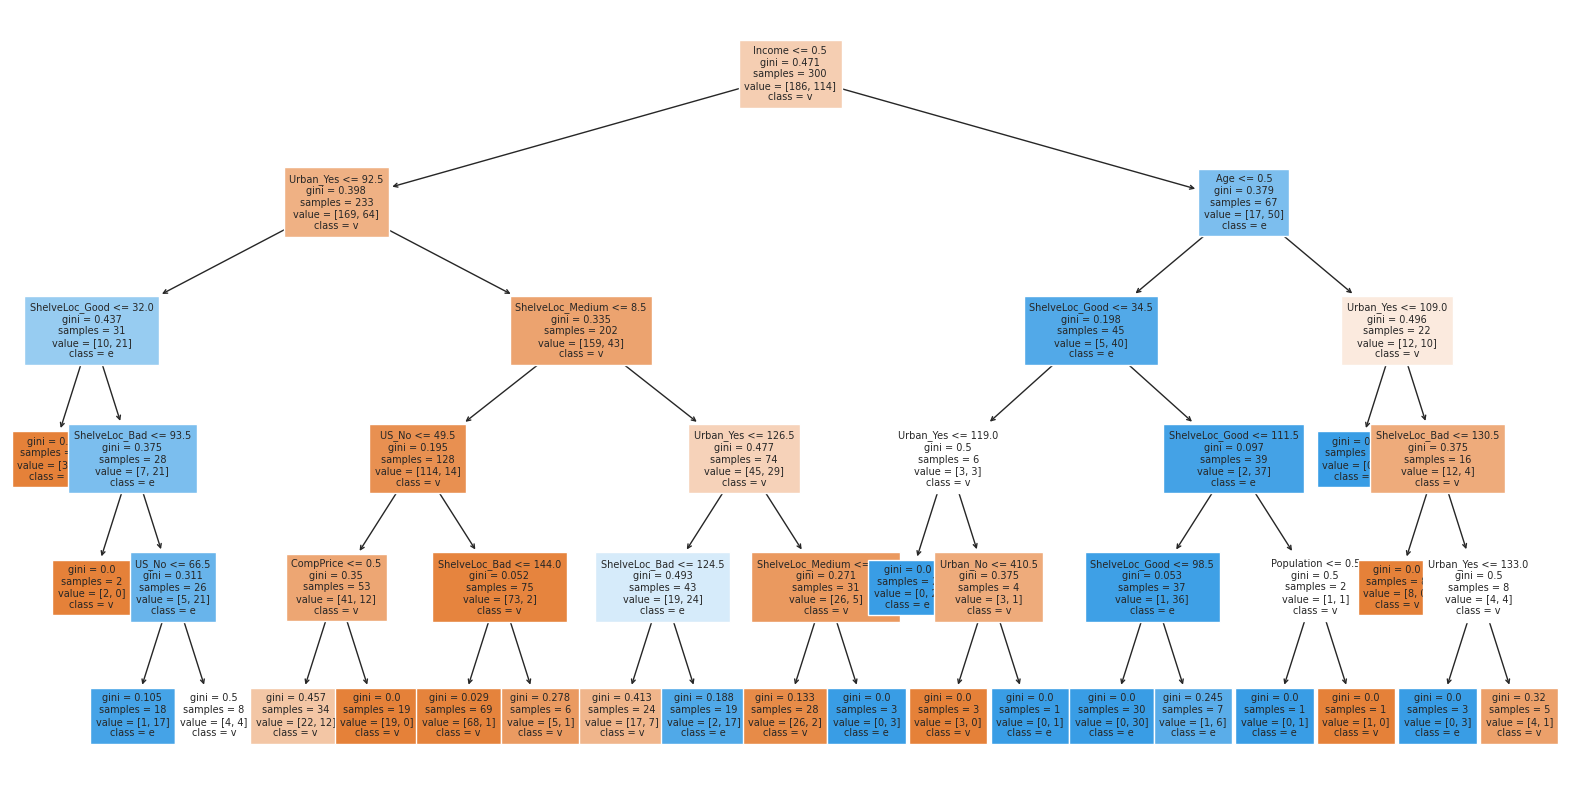

In [38]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = labels.tolist(),
            class_names   = 'ventas_altas',
            filled        = True,
            impurity      = True,
            fontsize      = 7,
            ax            = ax
       )

# Predicción y evaluación del modelo


Se evalúa la capacidad predictiva del árbol inicial calculando el accuracy en el conjunto de test.

In [39]:
# Error de test del modelo
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test_prep,)

print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

Matriz de confusión
-------------------


array([[44,  6],
       [23, 27]])

In [40]:
print(classification_report(y_test, predicciones))


              precision    recall  f1-score   support

           0       0.66      0.88      0.75        50
           1       0.82      0.54      0.65        50

    accuracy                           0.71       100
   macro avg       0.74      0.71      0.70       100
weighted avg       0.74      0.71      0.70       100



In [41]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 71.0 %


El modelo inicial es capaz de predecir correctamente un 72 % de las observaciones del conjunto de test.

### Podado del árbol (pruning)


Aunque inicialmente se ha empleado un valor de max_depth=5, este no tiene por qué ser el mejor valor. Con el objetivo de identificar la profundidad óptima que consigue reducir la varianza y aumentar la capacidad predictiva del modelo, se somete al árbol a un proceso de pruning.

In [42]:
np.linspace(0,5,20)

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

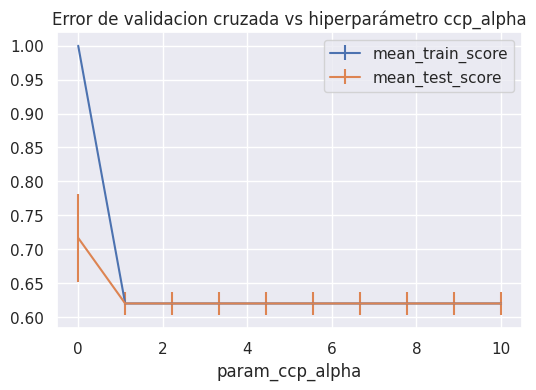

In [0]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha': np.linspace(0, 10, 10)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_prep, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [0]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006875,0.010974,0.001818,0.000437,0.0,{'ccp_alpha': 0.0},0.7,0.666667,0.8,0.666667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,0.000000
1,0.003664,0.000780,0.001608,0.000241,1.111111,{'ccp_alpha': 1.1111111111111112},0.6,0.600000,0.6,0.600000,...,0.622222,0.622222,0.618519,0.618519,0.618519,0.618519,0.618519,0.618519,0.62,0.001814
2,0.003335,0.000380,0.001547,0.000201,2.222222,{'ccp_alpha': 2.2222222222222223},0.6,0.600000,0.6,0.600000,...,0.622222,0.622222,0.618519,0.618519,0.618519,0.618519,0.618519,0.618519,0.62,0.001814
3,0.003679,0.000689,0.001801,0.000397,3.333333,{'ccp_alpha': 3.3333333333333335},0.6,0.600000,0.6,0.600000,...,0.622222,0.622222,0.618519,0.618519,0.618519,0.618519,0.618519,0.618519,0.62,0.001814
4,0.003241,0.000194,0.001501,0.000079,4.444444,{'ccp_alpha': 4.444444444444445},0.6,0.600000,0.6,0.600000,...,0.622222,0.622222,0.618519,0.618519,0.618519,0.618519,0.618519,0.618519,0.62,0.001814
5,0.003547,0.001303,0.001544,0.000220,5.555556,{'ccp_alpha': 5.555555555555555},0.6,0.600000,0.6,0.600000,...,0.622222,0.622222,0.618519,0.618519,0.618519,0.618519,0.618519,0.618519,0.62,0.001814
6,0.003128,0.000233,0.001644,0.000332,6.666667,{'ccp_alpha': 6.666666666666667},0.6,0.600000,0.6,0.600000,...,0.622222,0.622222,0.618519,0.618519,0.618519,0.618519,0.618519,0.618519,0.62,0.001814
7,0.003421,0.000515,0.001937,0.001213,7.777778,{'ccp_alpha': 7.777777777777779},0.6,0.600000,0.6,0.600000,...,0.622222,0.622222,0.618519,0.618519,0.618519,0.618519,0.618519,0.618519,0.62,0.001814
8,0.003062,0.000095,0.001517,0.000105,8.888889,{'ccp_alpha': 8.88888888888889},0.6,0.600000,0.6,0.600000,...,0.622222,0.622222,0.618519,0.618519,0.618519,0.618519,0.618519,0.618519,0.62,0.001814
9,0.003060,0.000066,0.001477,0.000036,10.0,{'ccp_alpha': 10.0},0.6,0.600000,0.6,0.600000,...,0.622222,0.622222,0.618519,0.618519,0.618519,0.618519,0.618519,0.618519,0.62,0.001814


In [0]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 0.0}

Una vez identificado el valor óptimo de ccp_alpha, se reentrena el árbol indicando este valor en sus argumentos. Si en el GridSearchCV() se indica refit=True, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en `.best_estimator_.`

In [0]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 9
Número de nodos terminales: 49


In [0]:
# Error de test del modelo final
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test_prep)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 75.0 %


In [0]:
confusion_matrix(y_test, predicciones)

array([[40, 10],
       [15, 35]])

In [0]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        50
           1       0.78      0.70      0.74        50

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



### Importancia de predictores


La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el índice Gini, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.

In [0]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': labels.tolist(),
                             'importancia': modelo_final.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
11,Urban_Yes,0.267291
7,ShelveLoc_Bad,0.173585
1,Income,0.163736
8,ShelveLoc_Good,0.093583
9,ShelveLoc_Medium,0.089938
12,US_No,0.055480
6,Education,0.039439
4,Price,0.035371
0,CompPrice,0.033437
10,Urban_No,0.024170


### Predicción de probabilidades


La mayoría de implementaciones de los modelos basados en árboles, entre ellas la de scikit-learn, permiten predicir probabilidades cuando se trata de problemas de clasificación. Es importante entender cómo se calculan estos valores para interpretarlos y utilizarlos correctamente.

En el ejemplo anterior, al aplicar `.predict()` se devuelve  0  (ventas elevadas) o  1 (ventas bajas) para cada observación de test. Sin embargo, no se dispone de ningún tipo de información sobre la seguridad con la que el modelo realiza esta asignación. Con `.predict_proba()`, en lugar de una clasificación, se obtiene la probabilidad con la que el modelo considera que cada observación puede pertenecer a cada una de las clases.

In [0]:
# Predicción de probabilidades
#-------------------------------------------------------------------------------
predicciones = modelo.predict_proba(X = X_test_prep)
predicciones

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.10526316, 0.89473684],
       [0.05555556, 0.94444444],
       [0.10526316, 0.89473684],
       [0.5       , 0.5       ],
       [0.92857143, 0.07142857],
       [0.05555556, 0.94444444],
       [0.98550725, 0.01449275],
       [0.70833333, 0.29166667],
       [0.98550725, 0.01449275],
       [0.98550725, 0.01449275],
       [0.64705882, 0.35294118],
       [0.        , 1.        ],
       [0.98550725, 0.01449275],
       [0.64705882, 0.35294118],
       [0.10526316, 0.89473684],
       [0.98550725, 0.01449275],
       [0.83333333, 0.16666667],
       [0.98550725, 0.01449275],
       [0.98550725, 0.01449275],
       [0.70833333, 0.29166667],
       [0.05555556, 0.94444444],
       [0.14285714, 0.85714286],
       [0.83333333, 0.16666667],
       [0.98550725, 0.01449275],
       [0.        , 1.        ],
       [0.98550725, 0.01449275],
       [0.64705882, 0.35294118],
       [0.70833333, 0.29166667],
       [1.

El resultado de `.predict_proba()` es un array con una fila por observación y tantas columnas como clases tenga la variable respuesta. El valor de la primera columna se corresponde con la probabilidad, acorde al modelo, de que la observación pertenezca a la clase 0, y así sucesivamente. El valor de probabilidad mostrado para cada predicción se corresponde con la fracción de observaciones de cada classe en el nodo terminal al que ha llegado la observación predicha.

Por defecto, `.predict()` asigna cada nueva observación a la clase con mayor probabilidad (en caso de empate se asigna de forma aleatoria). Sin embargo, este no tiene por qué ser el comportamiento deseado en todos los casos.

In [0]:
# Clasificación empleando la clase de mayor probabilidad
# ------------------------------------------------------------------------------
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
df_predicciones['clasificacion_default_0.5'] = np.where(df_predicciones['0'] > df_predicciones['1'], 0, 1)
df_predicciones.head(10)

,0,1,clasificacion_default_0.5
0,0.000000,1.000000,1
1,1.000000,0.000000,0
2,0.105263,0.894737,1
3,0.055556,0.944444,1
4,0.105263,0.894737,1
5,0.500000,0.500000,1
6,0.928571,0.071429,0
7,0.055556,0.944444,1
8,0.985507,0.014493,0
9,0.708333,0.291667,0


Supóngase el siguiente escenario: la campaña de navidad se aproxima y los propietarios de la cadena quieren duplicar el stock de artículos en aquellas tiendas de las que se prevee que tengan ventas elevadas. Como el transporte de este material hasta las tiendas supone un coste elevado, el director quiere limitar esta estrategia únicamente a tiendas para las que se tenga mucha seguridad de que van conseguir muchas ventas.

Si se dispone de las probabilidades, se puede establecer un punto de corte concreto, por ejemplo, considerando únicamente como clase  1  (ventas altas) aquellas tiendas cuya predicción para esta clase sea superior al 0.8 (80%). De esta forma, la clasificación final se ajusta mejor a las necesidades del caso de uso.

In [0]:
# Clasificación final empleando un threshold de 0.8 para la clase 1.
# ------------------------------------------------------------------------------
df_predicciones['clasificacion_custom_0.8'] = np.where(df_predicciones['1'] > 0.8, 1, 0)
df_predicciones.iloc[5:40, :]

,0,1,clasificacion_default_0.5,clasificacion_custom_0.8
5,0.500000,0.500000,1,0
6,0.928571,0.071429,0,0
7,0.055556,0.944444,1,1
8,0.985507,0.014493,0,0
9,0.708333,0.291667,0,0
10,0.985507,0.014493,0,0
11,0.985507,0.014493,0,0
12,0.647059,0.352941,0,0
13,0.000000,1.000000,1,1
14,0.985507,0.014493,0,0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b01f3fd-002a-43ad-8b2f-83f22b9a4ee6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>